# [E-01] RockPaperScissors
"Exploration Node 1. 인공지능과 가위 바위보 하기" / 2022. 01. 05 (Wed) 이형주

    시작: 2021. 01. 04 (Tue) 10:00 KST
    종료: 2021. 01. 05 (Wed) 21:00 KST
    소요: 10 Hrs

## Contents
---
- **성과**
- **데이터셋 수집 및 전처리**
- **분류모델 설계 및 학습**
- **분류모델 성능 평가**
    + Test Set 정확도 (per Epoch)
    + Training Set 정확도 (per Epoch)
    
    
- **프로젝트 회고**    
    1. 분류모델 정확도를 위한 시행착오
    2. 오버피팅 해결을 위한 시행착오
    3. 어려웠던 점
    4. 프로젝트 후기

## Rubric 평가기준
---

|  평가문항  |  상세기준  |
|:---------|:---------|
|1. 이미지 분류기 모델이 성공적으로 만들어졌는가?|트레이닝이 정상적으로 수행되었음.
|2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?|데이터셋의 다양성, 정규화 등의 시도가 적절하였음.
|3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?|60% 이상 도달하였음.


## 성과
---

**Disclaimer: 실행 횟수, 시기에 따라 수치의 변동이 소폭 발생할 수 있음**


[[E-01] RockPaperScissors - Data Training Statistics](https://docs.google.com/spreadsheets/d/1UC2XsA3i-udpxbUMHhclmFvdhEdyhcbC_tZumnZObjk/edit#gid=0)

|  평가문항  |  상세기준  |
|:---------|:---------|
|1. 데이터 셋, 이미지 분류기 모델 Accuracy|트레이닝 셋(Epoch 7) **99.23%**, 테스트 셋 **92.89%**, 분류 모델 **94.33%**
|2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?| 오버피팅 극복을 위하여 Dropout 25% 시도, 테스트 셋 Accuracy **66%**

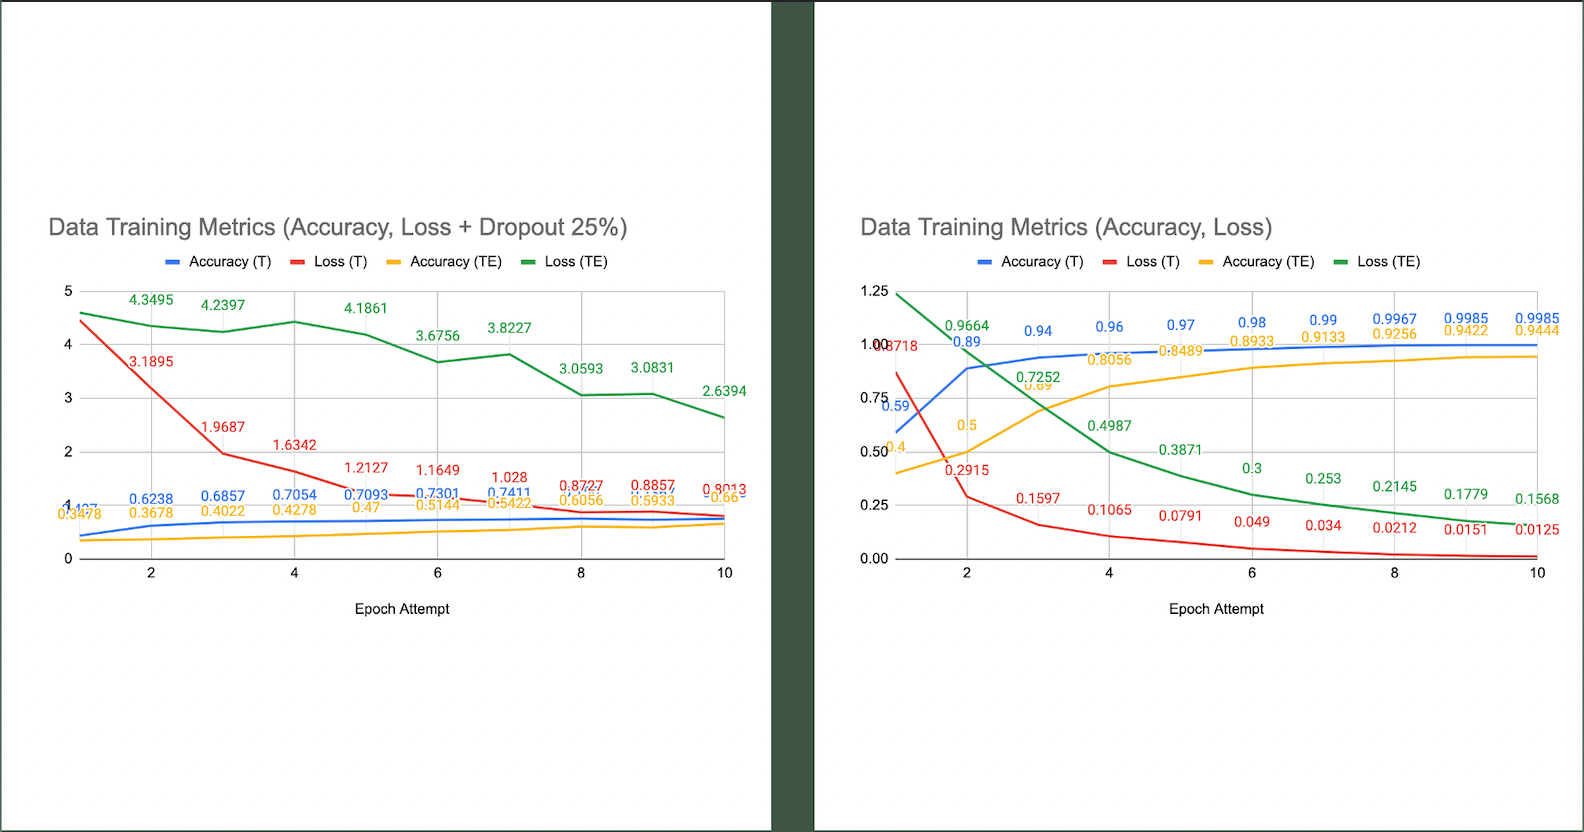

## 데이터셋 수집 및 전처리
---

### 수집

+ Training Set 사진 3,357장
   * Rock 1,071장, Paper 1,213장, Scissor 1,073장
   * 황인, 백인, 흑인 등 다양한 인종별 손 사진이 있어 **데이터셋 다양성 확보**
   * 각자 다른 3가지 이상의 환경에서 촬영된 사진을 사용하여 **데이터셋 다양성 확보**
+ Test Set 사진 900장
   * Rock 300장, Paper 300장, Scissor 300장

+ Training Set Source
    * [Laurence Moroney](https://laurencemoroney.com/datasets.html)
    * [토닥토닥 티처블 머신](https://drive.google.com/drive/folders/1ezRNesmlMGR_zDkOMl9wNhvo3aHnVgK5?usp=sharing)
    * [황지은님 데이터셋 Rock](https://drive.google.com/file/d/1H3k01-pUrpPaPFK47b1nbbJvqYNuqJny/view)
    * [황지은님 데이터셋 Paper](https://drive.google.com/file/d/1H3k01-pUrpPaPFK47b1nbbJvqYNuqJny/view)
    * [황지은님 데이터셋 Scissor](https://drive.google.com/file/d/1BCQed9Yh-WXUG7Mxmp6VZEO3uQbgQjG9/view)
    
+ Test Set Source
    * [이용철님 데이터셋](https://drive.google.com/drive/folders/1bMfm4Q4Gz62oThA5owMJ2Gh9Ef2O4BRv?usp=sharing)
    * [신채은님 데이터셋](https://drive.google.com/drive/folders/1fUBSFrurZW2TqLosmjFD1mLvFkZr5t7f?usp=sharing)
    * [오휴민님 데이터셋](https://drive.google.com/drive/folders/1NOS51TAzRH6WPBz4Ow4uHTb2u-3X5nHF?usp=sharing)

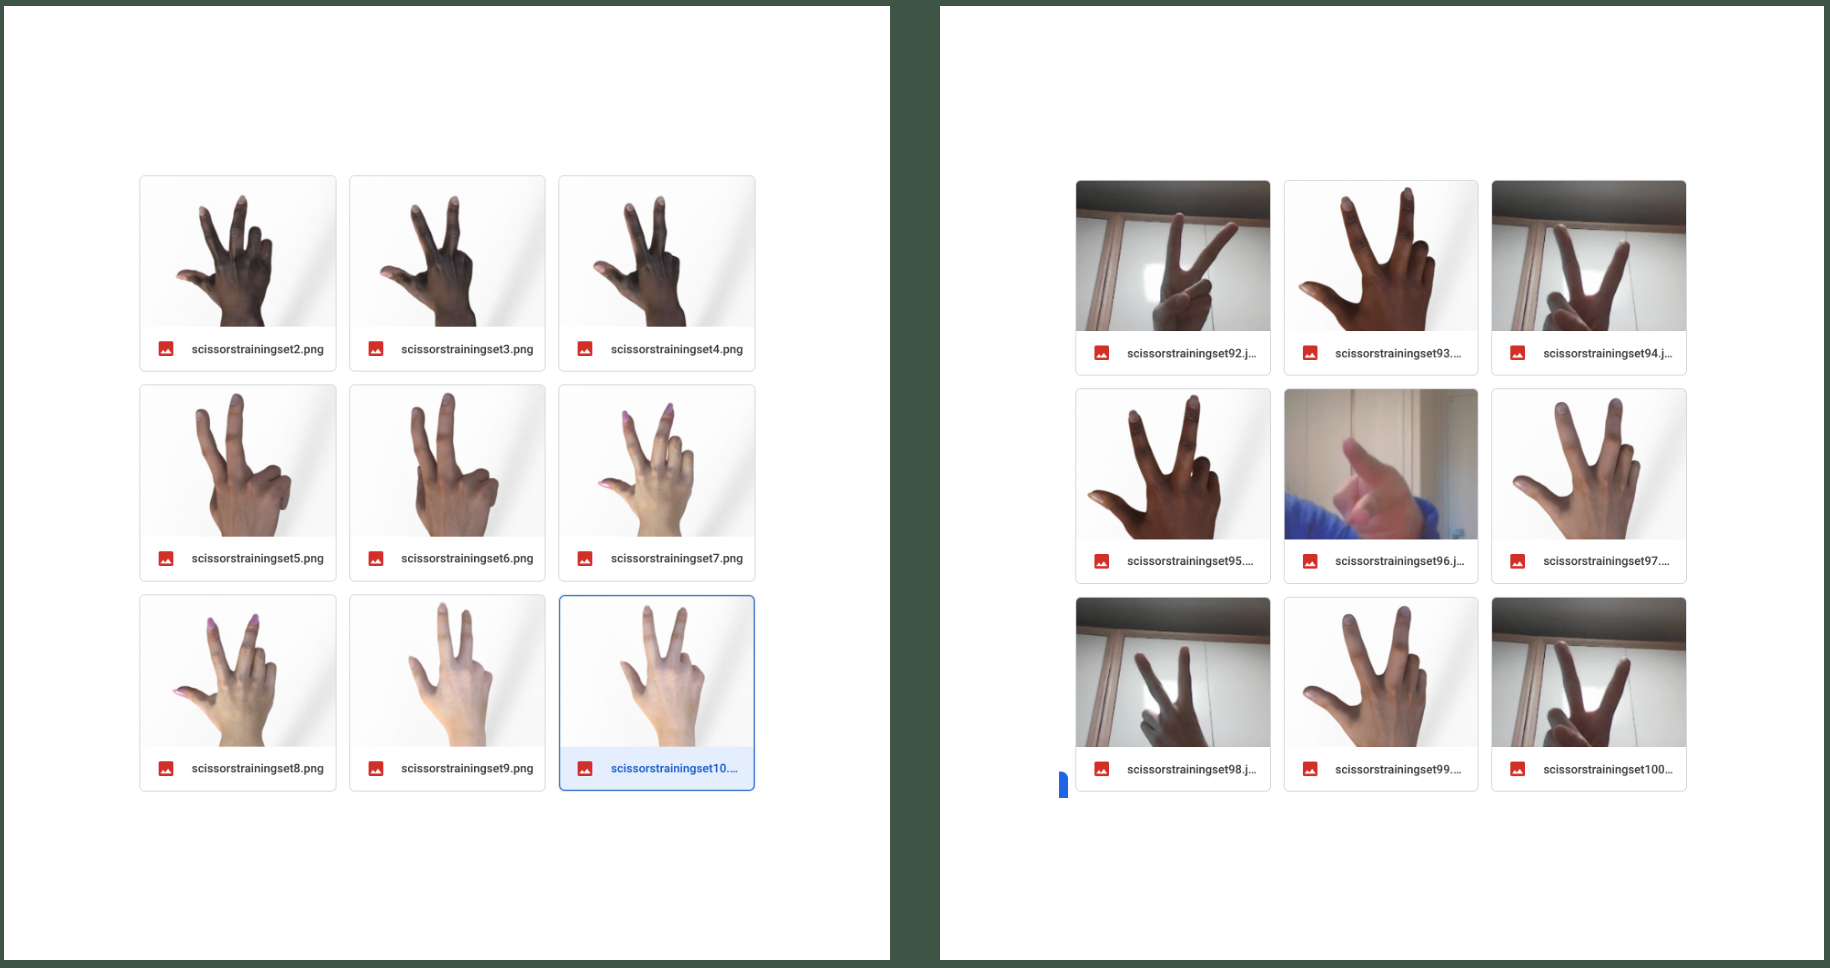

### 전처리

+ **Step 1. 전처리를 위한 라이브러리 List**
    - keras: Tensorflow 프레임워크 + 인공신경망 코드 사용
    - numpy: 이미지 데이터 행렬 생성
    - matplotlib: PIL을 이용한 이미지 리사이징 및 출력물 확인
    - PIL: 데이터셋 이미지 크기 조절 (To 28x28)
    - Glob: 파일 리스트 추출 및 image 변수에 저장

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


+ **Step 2. 이미지 리사이징**
    - 244 x 244, 외부에서 들여온 이미지를 => 28x28로 일괄 변경
    - **jpg는 jpg 끼리, png는 png끼리 모아서** 리사이징하여 저장
    - 낮은 해상도로 변환시 화질 깨짐을 개선하기 위한 안티앨리언싱 처리 (Image.ANTIALIAS)

In [8]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [9]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

234  images to be resized.
234  images resized.
가위 이미지 resize 완료!
371  images to be resized.
371  images resized.
보 이미지 resize 완료!
232  images to be resized.
232  images resized.
바위 이미지 resize 완료!


In [10]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.png")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "png")
    
	print(len(images), " images resized.")

In [11]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

840  images to be resized.
840  images resized.
가위 이미지 resize 완료!
840  images to be resized.
840  images resized.
보 이미지 resize 완료!
840  images to be resized.
840  images resized.
바위 이미지 resize 완료!


### 이미지를 더 작게 리사이징 하는 이유는 무엇일까

+ Cornell University의 Computer Vision 논문에 따르면, **이미지 리사이징이 딥러닝 모델의 업무처리 효율성 측면에서 확실한 이점이 있다**고 했다. 물론 이 논문은 이미지 리사이징 모델과, (이미지) 인식 모델 모두 훈련시켰다는 점에서 현재 프로젝트에 적용한 안티앨리언싱 적용 내용과는 약간의 차이가 있다. 다만, 딥러닝 모델을 학습하는 과정에서 이미지 품질을 덜 낮추기 위한 최적화를 시켰다는 공통점이 있으므로 충분히 참고할 수 있는 자료라고 하겠다.

+ 하단은 Input Image 해상도 대비 Output Image 해상도에 따른 에러(손실) 발생율을 보여준다. Total FLOPS(컴퓨터의 1초당 부동소숫점 계산 횟수) 값이 해상도가 낮을수록 떨어지는 반면, Top-1/5 Error 율은 유의미한 차이를 보이지 않았으므로 장점이 더 많다는 것을 알 수 있다.

_"Conclusion: Our experiments show that task-optimized deep
vision models can benefit from replacing traditional image
resizers with learned resizers."_

**Source: [Learning to Resize Images for Computer Vision Tasks
Hossein Talebi, Peyman Milanfar / Cornell University](https://arxiv.org/abs/2103.09950v1)**

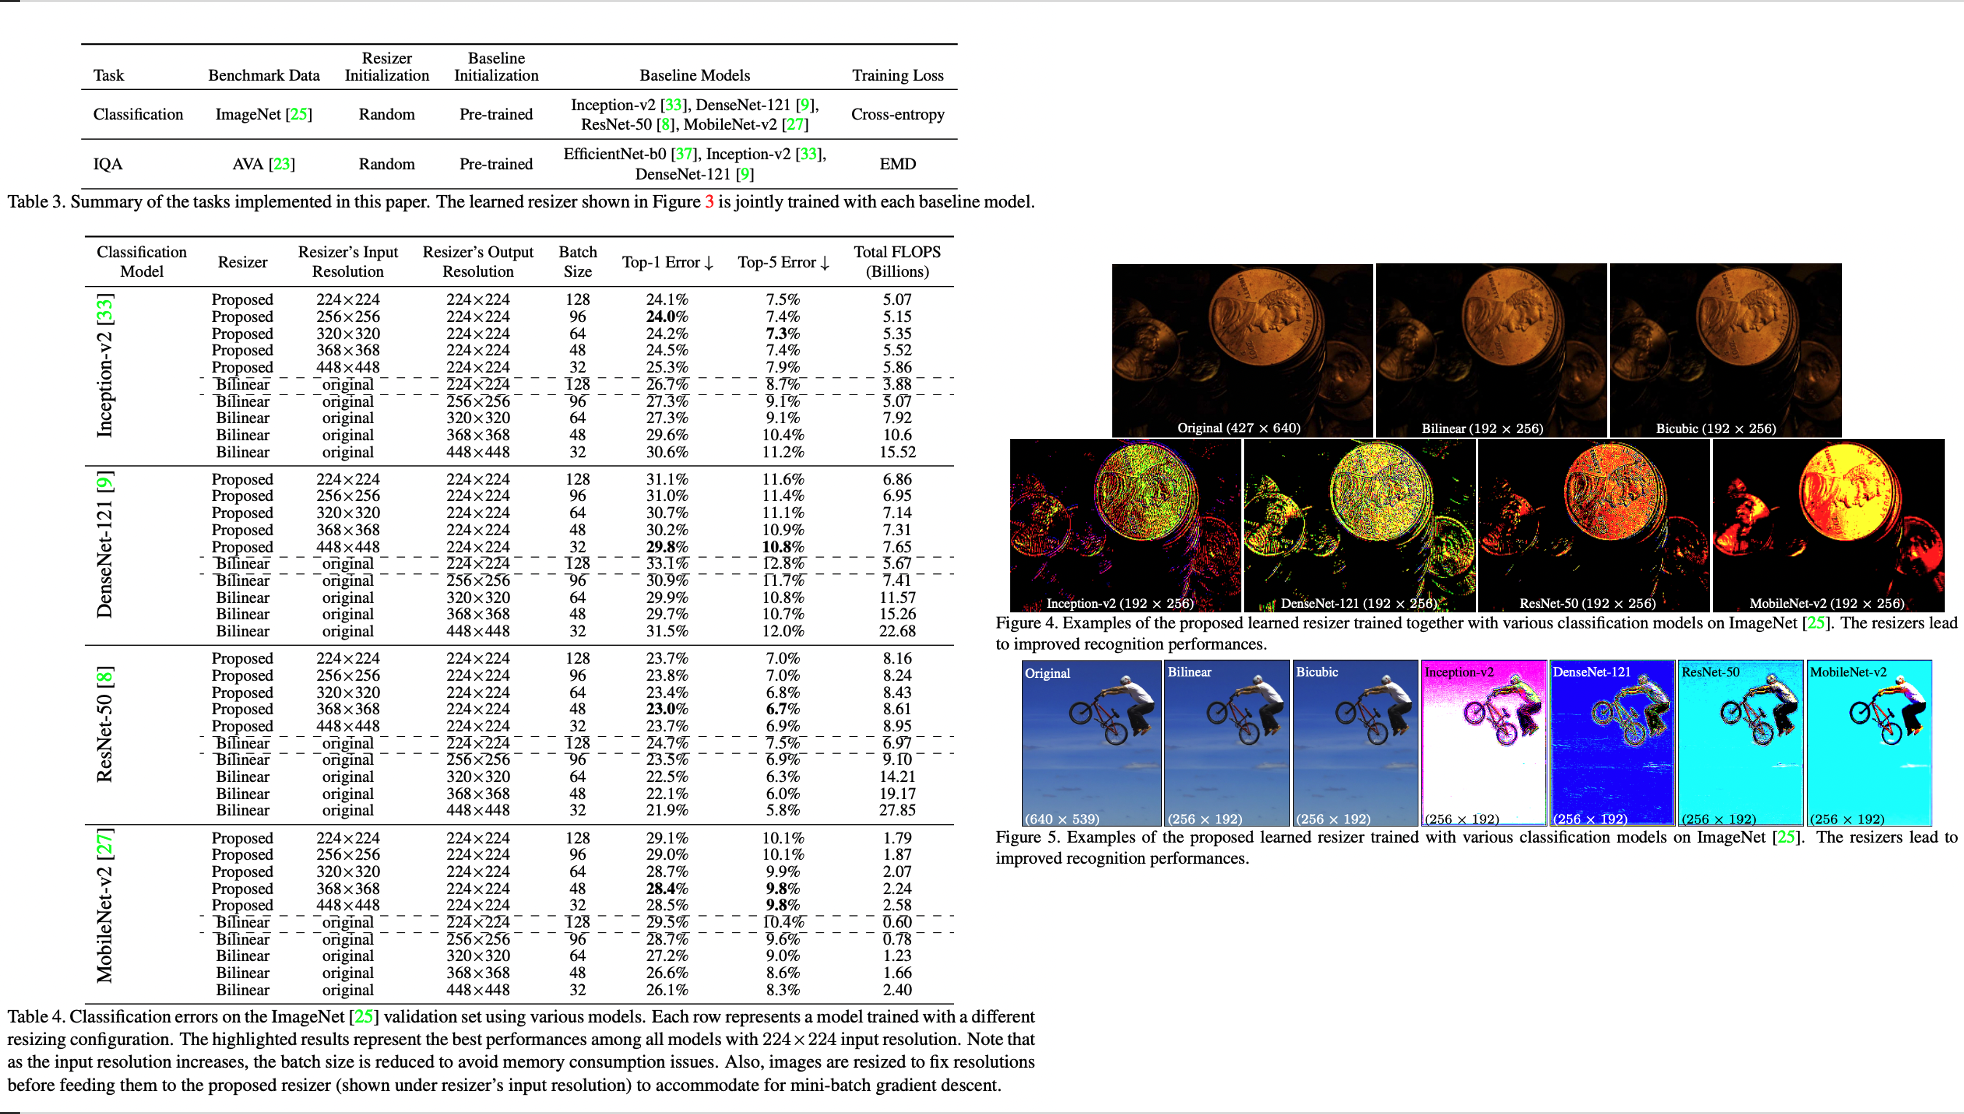

+ **Step 3. 이미지 불러오기**
    - 딥러닝을 위한 행렬 지정: 가위를 0, 바위를 1, 보를 2
    - color는 R,G,B가 있으므로 3 / jpg, png 확장자별 분리하여 이미지 호출
    - 학습 데이터 x_train은 3,357개로, 이미지 사이즈 28x28, Color 3이 순서대로 확인

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

def load_data(img_path, number_of_data=3357):  # 가위바위보 이미지 개수 총합.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/scissor/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1
        
    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))

학습데이터(x_train)의 이미지 개수는 3357 입니다.
x_train shape: (3357, 28, 28, 3)


라벨:  0


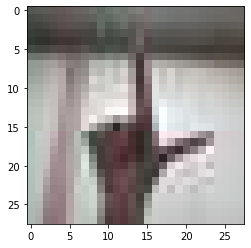

In [8]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])
## 학습 이미지 호출

## 분류모델 설계 및 학습
---

In [6]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

## hyperparameters

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

## 이미지의 특징의 가지수가 32, 64가 된다.
## 영상 처리에 쓰는 Conv2D를 사용하고, MaxPool(Pooling2D)가 작은 크기로 줄여 학습한 뒤
## Flatten이 2->1차원으로 영상을 변환하여 마무리 된다.
## 뉴런의 수는 64이다.

print('Model에 추가된 Layer 개수: ', len(model.layers))

## 7개의 Layer로 딥러닝 모델을 구현한다.

Model에 추가된 Layer 개수:  7


### Activation Functions

왜 ReLU를 메인으로 사용했을까

+ 학습을 위한 Hidden Layer에서는, ReLU를 적용하는 것이 정확도 측면에서 유리하다는 의미로 이해하였다.
+ 내부 hidden layer를 활성화 시키는 함수로 sigmoid를 사용하지 않고 ReLU라는 활성화 함수를 사용하게 되는데, 이 함수는 쉽게 말해 0보다 작은 값이 나온 경우 0을 반환하고, 0보다 큰 값이 나온 경우 그 값을 그대로 반환하는 함수다. 0보다 큰 값일 경우 1을 반환하는 sigmoid와 다르다. 따라서 **내부 hidden layer에는 ReLU를 적용하고, 마지막 output layer에서만 sigmoid 함수를 적용하면 이전에 비해 정확도가 훨씬 올라가게 된다.**

Source: [ML — Sigmoid 대신 ReLU? 상황에 맞는 활성화 함수 사용하기, Minkyeong Kim](https://medium.com/@kmkgabia/ml-sigmoid-%EB%8C%80%EC%8B%A0-relu-%EC%83%81%ED%99%A9%EC%97%90-%EB%A7%9E%EB%8A%94-%ED%99%9C%EC%84%B1%ED%99%94-%ED%95%A8%EC%88%98-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0-c65f620ad6fd)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [6]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

Before Reshape - x_train_norm shape: (3357, 28, 28, 3)
After Reshape - x_train_reshaped shape: (3357, 28, 28, 3)


In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## optimizer: adam이 현재 많이 사용되는 optimizer로, hyperparameter를 갱신시킨다. 
## sparse_categorical_crossentropy: 글자 그대로 다중분류 손실 함수를 의미한다.

In [8]:
model.fit(x_train_reshaped, y_train, epochs=7)

Epoch 1/7
105/105 [==============================] - 3s 4ms/step - loss: 0.8342 - accuracy: 0.6250
Epoch 2/7
105/105 [==============================] - 0s 3ms/step - loss: 0.2708 - accuracy: 0.8975
Epoch 3/7
105/105 [==============================] - 0s 3ms/step - loss: 0.1577 - accuracy: 0.9476
Epoch 4/7
105/105 [==============================] - 0s 3ms/step - loss: 0.1028 - accuracy: 0.9666
Epoch 5/7
105/105 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9821
Epoch 6/7
105/105 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9878
Epoch 7/7
105/105 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9923


## 분류모델 성능 평가
---

### Test Set 투입

#### 이미지 리사이징

In [26]:
## 가위 이미지 300장 리사이징 (28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/Test/scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

## 바위 이미지 300장 리사이징 (28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/Test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

## 보 이미지 300장 리사이징 (28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/Test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

300  images to be resized.
300  images resized.
가위 이미지 resize 완료!
300  images to be resized.
300  images resized.
바위 이미지 resize 완료!
300  images to be resized.
300  images resized.
보 이미지 resize 완료!


#### 이미지 데이터 로드, 예시 이미지 출력

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

#load_data를 이용하여 Test 데이터 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/Test/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))

학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 28, 28, 3)


라벨:  0


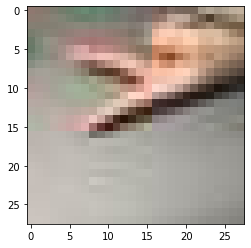

In [10]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 테스트셋 예시 이미지 로드

#### 분류모델 설계 및 작동

In [4]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [5]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

Before Reshape - x_train_norm shape: (900, 28, 28, 3)
After Reshape - x_train_reshaped shape: (900, 28, 28, 3)


In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
29/29 [==============================] - 3s 6ms/step - loss: 1.3569 - accuracy: 0.3211
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 0.9947 - accuracy: 0.5478
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 0.7677 - accuracy: 0.6522
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.7989
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.4208 - accuracy: 0.8500
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.3153 - accuracy: 0.8944
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.2467 - accuracy: 0.9144
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.2419 - accuracy: 0.9211
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.2049 - accuracy: 0.9367
Epoch 10/10
29/29 [==============================] - 0s 3ms/step - loss: 0.1700 - accuracy: 0.9511


In [18]:
test_loss, test_accuracy = model.evaluate(x_train_reshaped,y_train, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

29/29 - 0s - loss: 0.1857 - accuracy: 0.9433
test_loss: 0.18570077419281006 
test_accuracy: 0.9433333277702332


## 프로젝트 회고
---

### 1. 분류모델 정확도를 위한 시행착오

+ 다른 사람, 다른 인종별로 다양한 이미지 Source를 가져올 수 있도록 하였다.
    - 본인 손 이미지를 사용하지 않고, 같이 학습하는 동기들의 이미지를 최대한 활용하였다.
    - 외부 Data Set을 적극적으로 도입하여 Training Set 자체를 신속하게 늘릴 수 있었다.
+ Training Set 이미지를 3,000장 이상 확보할 수 있도록 하였다.
+ 가위/바위/보를 2D로 구분하는 것은 단순 분류 작업이므로 Dense 값을 64 -> 32로 조정하였다.

### 2. 오버피팅 해결을 위한 시행착오

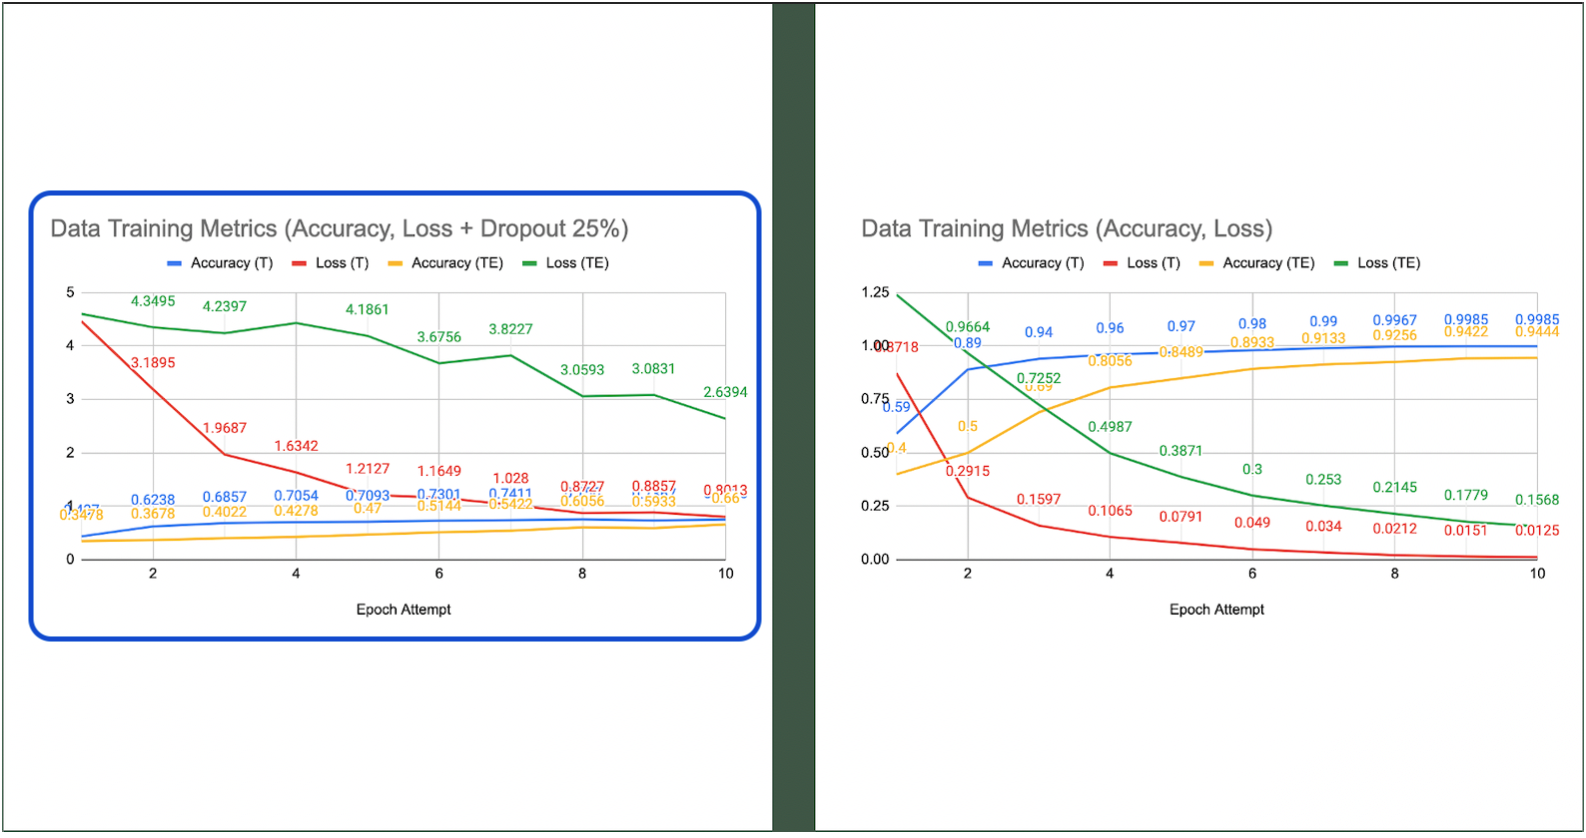

+ 신경망 일부를 사용하지 않는 방법으로, 오버피팅을 예방하는 Dropout을 시범 도입하였다.
+ Dropout 25%를 적용한 결과, 모델 Accuracy 70.74% / Test Set Accuracy 66%를 기록하였다.
+ Dropout 적용이 오버피팅을 해결할 수는 있으나 딥러닝 모델의 성능에 항상 도움이 되는 것은 아니라는 점을 알게 되었다.

In [ ]:
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.models import Sequential
## 오버피팅 해결을 위한 Dropout 추가

model.add(keras.layers.Dense(64, activation='relu'))
model.add(Dropout(0.25))
## Dropout 비율 25%
model.add(keras.layers.Dense(10, activation='softmax'))
model.add(Dropout(0.25))
## Dropout 비율 25%

print('Model에 추가된 Layer 개수: ', len(model.layers))

### 3. 어려웠던 점

#### 데이터 셋 Format 일괄 변경
    1. PNG에서 Alpha 채널 제거하기   
    2. 한글 이름을 영문 이름으로 일괄 변경하기



* Alpha 채널 제거는 외부에서 찾아, 디렉토리에 넣어 .py 파일을 실행하는 방법으로 해결하였음.

**_코드 출처: [Zeantsoy](https://github.com/zeantsoi/remove-transparency)_**

```python
import os
from PIL import Image

# Absolute path to this script
scriptdir = os.path.dirname(os.path.abspath(__file__))

# Walk through directory
for root, subfolders, files in os.walk(scriptdir):
    for file in files:
        try:
            image = Image.open(os.path.join(scriptdir, root, file))
            # If image has an alpha channel
            if image.mode == 'RGBA':
                # Create a blank background image
                bg = Image.new('RGB', image.size, (255, 255, 255))
                # Paste image to background image
                bg.paste(image, (0, 0), image)
                # Save pasted image as image
                bg.save(os.path.join(scriptdir, root, file), "PNG")

        except:
            pass
```
        
* 이름 변경은, 경로 지정 후 일괄 변경이 가능한 코드를 외부에서 찾아 해결하였음.

**_코드 출처: [Geeksforgeeks](https://www.geeksforgeeks.org/rename-all-file-names-in-your-directory-using-python/)_**

```python
import os

os.chdir('/Users/hyeongju_lee_business/Downloads/rps integrated copy/scissors')
## 이름을 바꿀 파일의 경로 지정
print(os.getcwd())
 
for count, f in enumerate(os.listdir()):
    f_name, f_ext = os.path.splitext(f)
    f_name = "scissorstrainingset" + str(count)
## scissorstrainingset 이름을 기본값으로 + 숫자를 더하여 이름 변경 
    new_name = f'{f_name}{f_ext}'
    os.rename(f, new_name)
```

_결과 예시 (Paper Trainingset)_

|  As-Is(변경 전)  |  To-Be(변경 후)  |
|:---------|:---------|
|Image_복사.jpg|papertrainingset0.jpg|
|Image_복사2.jpg|papertrainingset1.jpg|
|...|...|

### 4. 프로젝트 후기

+ 실제로는 간단한 프로젝트였으나, 배경지식이 없는 상태에서는 10시간이 넘는 오랜 시간이 소요되었다. 딥러닝 지식이 매우 부족한 상태에서, 현 프로젝트 구현을 요구한 배경이 궁금해졌지만 그럼에도 흥미를 유발시키고 관심을 더 많이 가지게 되는 동기부여는 확실히 얻게 되었다. (Learning by Doing으로 프로젝트를 진행할 수 있다는 점도 매우 흥미로웠다)
+ hyperparameter를 크게 건드리지 않아도 Accuracy 달성에는 문제가 없었다. 배경에는 다양한 Training Set 확보 및 자체의 퀄리티에 있었던 것 같다. 다만 PNG 알파채널 제거와 같은 전처리 과정에서의 시간 소요가 많았던 점이 아쉽다.
+ 딥러닝 학습을 구체적으로 진행하지 않았으므로, 구현 전체 단계들이 새롭게 알아낸 것들이다. 따라서 딥러닝 학습을 많이 진행한 이후에 다양한 변수를 대입하여 리팩토링을 해야겠다. 그래야 기술적인 요구조건들을 더 성숙시킬 수 있을 것이다.
+ 현재 본인이 머신러닝, 딥러닝을 위한 수리/통계학 지식이 많이 부족하다는 것을 느껴, 시간을 들여 공부해야 함을 알게 되었다.